<div class="clearfix" style="padding: 10px; padding-left: 0px">
<a href="https://www.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/all/themes/theme537/images/unicamp.png" width="100px" style="display: inline-block; margin-top: 5px;"></a>
<a href="https://www.fee.unicamp.br/"><img src="http://www.fee.unicamp.br/sites/default/files/imagens/logo_feec_50anos_juntos.png" width="150px" class="pull-right" style="display: inline-block; margin: 0px;"></a>
</div>

## IE325Z - Introdução à Confiabilidade de Materiais e Dispositivos
## Lista 1 - Exercício 3

<br>

|Alunos   	|RA   	|e-mail   	|
|:-:	|:-:	|:-:	|
|Patricia Henriques Nallin  	|103717   	|patricia.nallin@gmail.com   	| 
|Mauricio Martins Donatti  	|092374   	|mmdonatti@gmail.com   	| 



|Professor     	|e-mail   	|
|:-:	|:-:	|
|Prof. Roberto Lacerda de Orio | orio@dsif.fee.unicamp.br |

### Instruções de Uso

Para rodar um trecho de código:

1. Clique para selecionar a célula
2. Aperte `SHIFT+ENTER` no teclado ou clique no botão (<button class='fa fa-play icon-play btn btn-xs btn-default'></button>) na barra superior da página.

### Enunciado
<br>
<div style="text-align: justify">Para o nosso sistema nervoso funcionar corretamente, a célula nervosa tem de ser capaz e gerar uma diferença de potencial de 50 mV. Isto é feito através da diferença de taxas de difusão de sódio (íons Na) e potássio (íons K). A relação de Na por K no nosso sangue é tipicamente 31,93. Se essa relação cair para 25,47 então problemas de saúde podem ocorrer.</div>

|Tempo(anos)|Na/K|
|:-:	|:-:	|
|0|31,93|
|1|31,61|
|2| 31,51|
|3| 31,43|

<br><div style="text-align: justify">a) Determine o tempo necessário para que Na/K atinja 30,00.
<br>
b) A redução de Na/K ocorre a uma taxa crescente ou decrescente?</div>

---

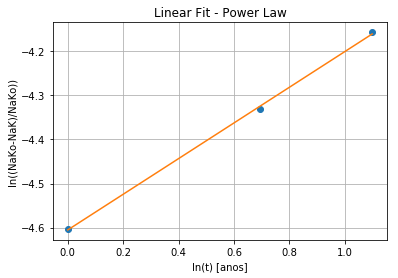

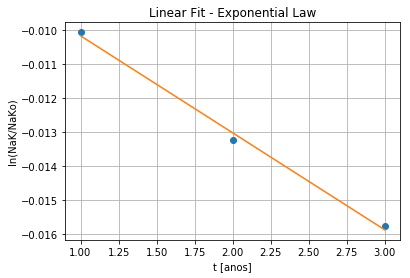

In [3]:
import matplotlib.pyplot as plt
import notebook_importer
from modules import IE325


# ----- Dados
tempo_anos = [0, 1, 2, 3]
NaK = [31.93, 31.61, 31.51, 31.43]


PL = IE325.PowerLaw(tempo_anos, NaK)
EL = IE325.ExponentialLaw(tempo_anos, NaK)

# ----- Dados linearizados
xlin,ylin = PL.LinearData()
xlin2,ylin2 = EL.LinearData() 

# ----- Plot    
plt.plot(xlin,ylin,'o', xlin, PL.LinearFit())
plt.title('Linear Fit - Power Law')
plt.xlabel('ln(t) [anos]')
plt.ylabel('ln((NaKo-NaK)/NaKo))')
plt.grid()
fig = plt.gcf()
plt.show() 

# ----- Plot    
plt.plot(xlin2,ylin2,'o', xlin2, EL.LinearFit())
plt.title('Linear Fit - Exponential Law')
plt.xlabel('t [anos]')
plt.ylabel('ln(NaK/NaKo)')
plt.grid()
fig = plt.gcf()
plt.show() 

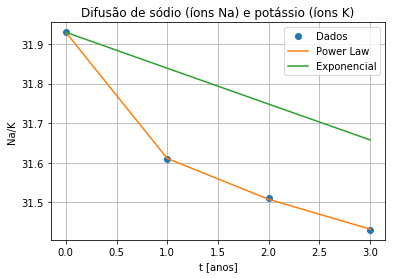

Equação de regimento:
Na/K(t) = 31.93 * (1 - 9.999e-03 * t^4.047e-01)
Na/K(t) = 31.93 - 3.193e-01 * t^4.047e-01


In [4]:
# --------------------------------------------------------
# SERIE ORIGINAL DE DADOS
# --------------------------------------------------------

# ----- Expansao dos Dados
# Sequencia original de dados
data = PL.Find_S(tempo_anos)
data2 = EL.Find_S(tempo_anos)

# ----- Plot    
plt.plot(tempo_anos,NaK,'o', tempo_anos, data, tempo_anos, data2)
plt.title('Difusão de sódio (íons Na) e potássio (íons K)')
plt.legend(['Dados','Power Law','Exponencial'])
plt.xlabel('t [anos]')
plt.ylabel('Na/K')
plt.grid()
fig = plt.gcf()
plt.show()


print("Equação de regimento:")
print("Na/K(t) = " + PL.LawComplete())
print("Na/K(t) = " + PL.LawSimple())

É possível perceber que a lei que se adequa ao problema é a Power Law.

Ela será utilizada nos próximos passos deste problema!

---
##### Tempo para a razão Na/K cair para 30.0


Sabendo-se da equação de regimento do problema, como apresentado anteriormente, é possível estimar em quanto tempo razão Na/K cai para 30.00

$\frac{Na}{K} (t) = 31.93 - 0.31926 . t^{0.405}$

$t = \sqrt[0.405]{\frac{(\frac{Na}{K} - 31.93)}{-0.31926}}$

Utilizando a função já pronta para a identificação do tempo de um determinado S criada para a POWER-LAW:

In [5]:
print (PL.Find_t(30.0))

85.2521768471


O tempo para Na/K atingir o valor de 30.00 é de, aproximadamente, **85.25 anos**!

---

##### Variáveis Associadas

In [6]:
print(PL.Variables())
print(EL.Variables())



Linear Fit Variables - Power Law:

a (slope coef) = 0.404730104949
b (intercept coef) = -4.60529968322
r_value (correlation coefficient) = 0.999700493041
std_err (standard error) = 0.00990789827387


Power Law Variables:

Ao = -0.00999870511154
n = 0.404730104949



Linear Fit Variables - Exponential Law:

a (slope coef) = -0.00285533770903
b (intercept coef) = -0.00732155370658
r_value (correlation coefficient) = -0.998000304332
std_err (standard error) = 0.000180845012138

Exponential Law Variables:

Ao = -0.00285533770903
